<a href="https://colab.research.google.com/github/Mohitgirase0001/Crop-recommendation-and-crop-yield-prediction-using-machine-learning/blob/main/Copy_of_crop_recommebdation_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


In [ ]:
# Load dataset
df = pd.read_csv("/content/new_crop_recommendation.csv")


In [ ]:
df.head()

,Soilcolor,Ph,K,P,N,Zn,S,QV2M-W,QV2M-Sp,QV2M-Su,...,PRECTOTCORR-W,PRECTOTCORR-Sp,PRECTOTCORR-Su,PRECTOTCORR-Au,WD10M,GWETTOP,CLOUD_AMT,WS2M_RANGE,PS,label
0,brown,6.10,226.000,4.000,0.1200,1.100,11.000,7.933333,8.403333,11.413333,...,1.763333,3.246667,13.013333,3.463333,88.38,0.74,59.11,6.26,76.54,Barley
1,brown,5.90,426.000,5.000,0.2375,2.600,9.000,7.183333,7.650000,10.476667,...,2.073333,2.613333,4.836667,3.630000,75.69,0.65,0.46,46.10,74.17,Barley
2,black,5.66,175.615,18.241,0.2518,2.235,21.445,7.183333,7.650000,10.476667,...,2.073333,2.613333,4.836667,3.630000,75.69,0.65,0.46,46.10,74.17,Barley
3,gray,5.37,168.490,2.690,0.1639,1.900,5.780,8.910000,9.480000,12.246667,...,2.293333,4.610000,17.446667,5.803333,68.94,0.73,59.11,5.44,78.25,Barley
4,brown,5.61,161.458,4.224,0.2300,1.325,12.158,7.183333,7.650000,10.476667,...,2.073333,2.613333,4.836667,3.630000,75.69,0.65,0.46,46.10,74.17,Barley


In [ ]:
# Set style
sns.set_style("whitegrid")


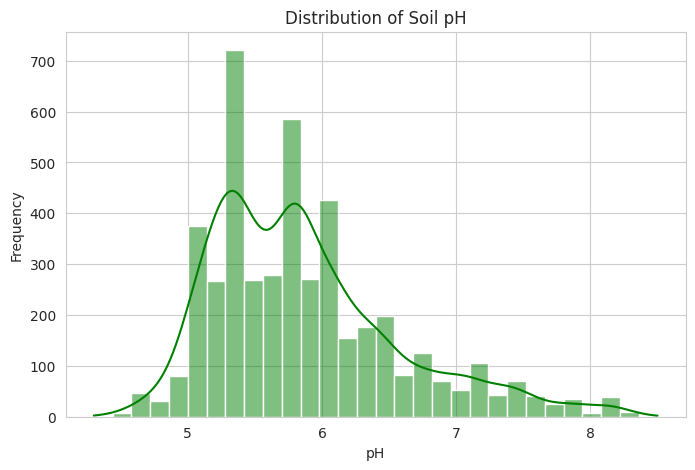

In [ ]:
# Distribution of Soil pH
plt.figure(figsize=(8,5))
sns.histplot(df['Ph'], bins=30, kde=True, color='green')
plt.title("Distribution of Soil pH")
plt.xlabel("pH")
plt.ylabel("Frequency")
plt.show()

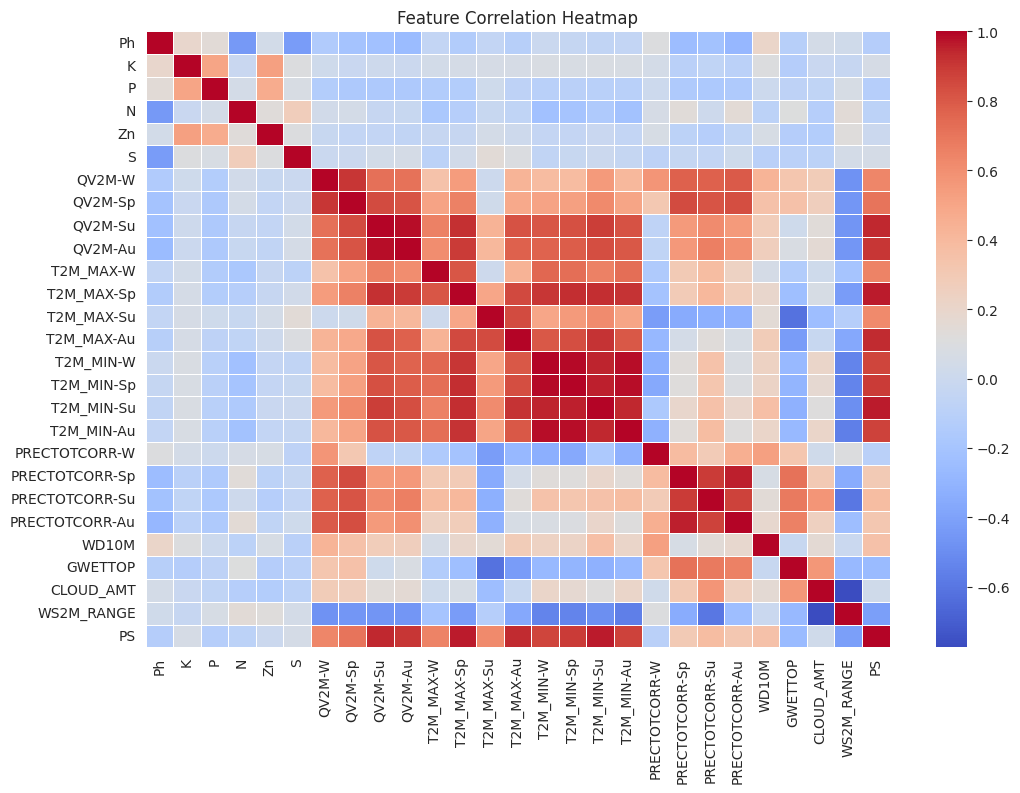

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
corr_matrix = df.drop(columns=['Soilcolor', 'label']).corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


<ipython-input-7-2733997dc0c1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['label'], order=df['label'].value_counts().index, palette='viridis')


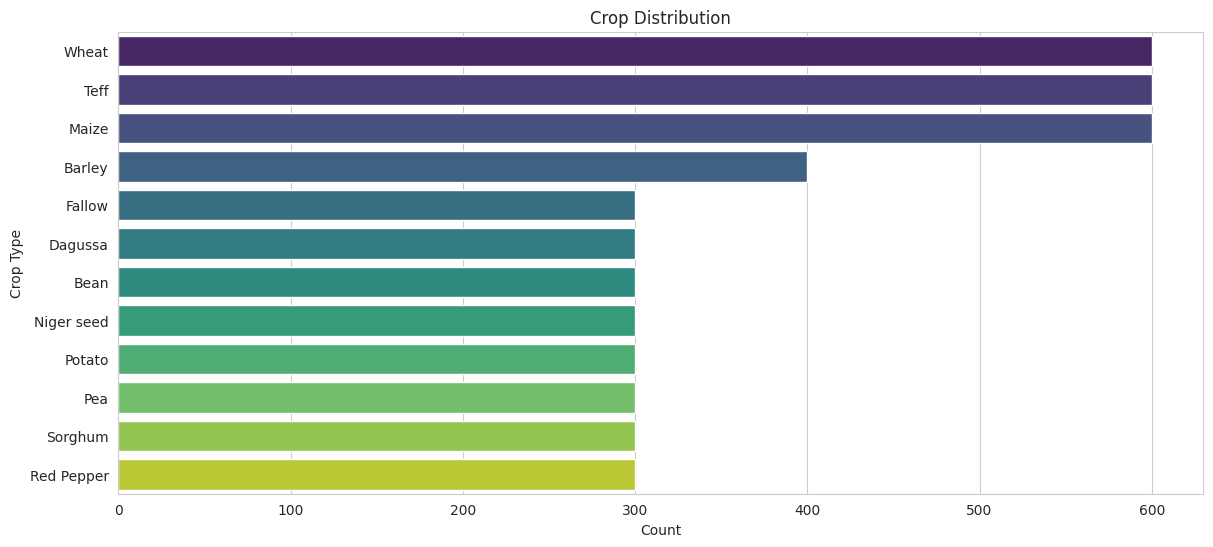

In [ ]:
# Countplot of Crops
plt.figure(figsize=(14,6))
sns.countplot(y=df['label'], order=df['label'].value_counts().index, palette='viridis')
plt.title("Crop Distribution")
plt.xlabel("Count")
plt.ylabel("Crop Type")
plt.show()

In [ ]:
# Encode categorical features
df['Soilcolor'] = LabelEncoder().fit_transform(df['Soilcolor'])
df['label'] = LabelEncoder().fit_transform(df['label'])

In [ ]:
# Split data into features and target
X = df.drop(columns=['label'])
y = df['label']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply Label Encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

In [ ]:
# Train and evaluate models
model_accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy
    print(f"{name} Model Accuracy: {accuracy * 100:.2f}%")

Random Forest Model Accuracy: 71.30%
SVM Model Accuracy: 24.46%
KNN Model Accuracy: 54.35%
Naive Bayes Model Accuracy: 24.78%
Logistic Regression Model Accuracy: 32.28%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Encode categorical feature (Soilcolor)
label_encoder = LabelEncoder()
df['Soilcolor'] = label_encoder.fit_transform(df['Soilcolor'])
soilcolor_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Soil Color Mapping:", soilcolor_mapping)


Soil Color Mapping: {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4), np.int64(5): np.int64(5), np.int64(6): np.int64(6), np.int64(7): np.int64(7), np.int64(8): np.int64(8), np.int64(9): np.int64(9), np.int64(10): np.int64(10), np.int64(11): np.int64(11), np.int64(12): np.int64(12), np.int64(13): np.int64(13), np.int64(14): np.int64(14), np.int64(15): np.int64(15), np.int64(16): np.int64(16), np.int64(17): np.int64(17), np.int64(18): np.int64(18), np.int64(19): np.int64(19), np.int64(20): np.int64(20), np.int64(21): np.int64(21), np.int64(22): np.int64(22), np.int64(23): np.int64(23), np.int64(24): np.int64(24), np.int64(25): np.int64(25), np.int64(26): np.int64(26), np.int64(27): np.int64(27), np.int64(28): np.int64(28), np.int64(29): np.int64(29), np.int64(30): np.int64(30), np.int64(31): np.int64(31), np.int64(32): np.int64(32), np.int64(33): np.int64(33), np.int64(34): np.int64(34), np.int64(35): np.in

In [ ]:
# Encode target variable (crop labels)
df['label'] = label_encoder.fit_transform(df['label'])


In [ ]:
# Split features and target
X = df.drop(columns=['label'])
y = df['label']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Model evaluation
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7141304347826087
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.43      0.47        93
           1       0.62      0.31      0.42        67
           2       0.89      1.00      0.94        56
           3       0.96      1.00      0.98        75
           4       0.60      0.62      0.61       114
           5       0.82      1.00      0.90        49
           6       0.85      0.98      0.91        64
           7       0.87      1.00      0.93        61
           8       0.89      1.00      0.94        48
           9       0.91      1.00      0.95        60
          10       0.50      0.56      0.53       108
          11       0.50      0.42      0.45       125

    accuracy                           0.71       920
   macro avg       0.74      0.78      0.75       920
weighted avg       0.70      0.71      0.70       920



In [ ]:
# Save the trained model
import joblib
joblib.dump(model, "crop_recommendation_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
file_path = "new_crop_recommendation.csv"  # Ensure this file is uploaded in Google Colab
df = pd.read_csv(file_path)

# Encode categorical feature (Soilcolor)
label_encoder = LabelEncoder()
df['Soilcolor'] = label_encoder.fit_transform(df['Soilcolor'])
soilcolor_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Soil Color Mapping:", soilcolor_mapping)

# Encode target variable (crop labels)
df['label'] = label_encoder.fit_transform(df['label'])

# Split features and target
X = df.drop(columns=['label'])
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save the trained model
joblib.dump(model, "crop_recommendation_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

# Function to take user input and make predictions
def predict_crop(soilcolor_name, ph, k, p, n, zn, s, qv2m_w, qv2m_sp, qv2m_su, qv2m_au,
                 t2m_max_w, t2m_max_sp, t2m_max_su, t2m_max_au, t2m_min_w, t2m_min_sp,
                 t2m_min_su, t2m_min_au, prectotcorr_w, prectotcorr_sp, prectotcorr_su,
                 prectotcorr_au, wd10m, gwettop, cloud_amt, ws2m_range, ps):
    # Load model and encoders
    model = joblib.load("crop_recommendation_model.pkl")
    scaler = joblib.load("scaler.pkl")
    label_encoder = joblib.load("label_encoder.pkl")

    # Convert soil color name to encoded value
    if soilcolor_name in soilcolor_mapping:
        soilcolor = soilcolor_mapping[soilcolor_name]
    else:
        raise ValueError("Invalid soil color name. Please choose from:", list(soilcolor_mapping.keys()))

    # Prepare input data
    input_data = np.array([[soilcolor, ph, k, p, n, zn, s, qv2m_w, qv2m_sp, qv2m_su, qv2m_au,
                             t2m_max_w, t2m_max_sp, t2m_max_su, t2m_max_au, t2m_min_w, t2m_min_sp,
                             t2m_min_su, t2m_min_au, prectotcorr_w, prectotcorr_sp, prectotcorr_su,
                             prectotcorr_au, wd10m, gwettop, cloud_amt, ws2m_range, ps]])

    # Scale input
    input_scaled = scaler.transform(input_data)

    # Predict crop
    predicted_label = model.predict(input_scaled)[0]
    predicted_crop = label_encoder.inverse_transform([predicted_label])[0]

    return predicted_crop

# Example usage
sample_prediction = predict_crop("Brown", 6.1, 226, 4, 0.12, 1.1, 11, 7.933, 8.403, 11.413, 10.15,
                                 24.85, 28.5, 23.533, 21.647, 6.253, 9.81, 10.587, 8.38, 1.763,
                                 3.247, 13.013, 3.463, 88.38, 0.74, 59.11, 6.26, 76.54)
print("Predicted Crop:", sample_prediction)

Soil Color Mapping: {'Black': np.int64(0), 'Brown': np.int64(1), 'Dark Brown': np.int64(2), 'Dark brown': np.int64(3), 'Dark gray': np.int64(4), 'Dark red': np.int64(5), 'Light red': np.int64(6), 'Lihgtish brown': np.int64(7), 'Red': np.int64(8), 'Red brown': np.int64(9), 'Reddis brown': np.int64(10), 'Reddish broown': np.int64(11), 'Reddish brown': np.int64(12), 'Reddish gray': np.int64(13), 'Redish Brown': np.int64(14), 'Redish brown': np.int64(15), 'Redishbrown': np.int64(16), 'Very dark brown': np.int64(17), 'Yellowish Brown': np.int64(18), 'Yellowish brown': np.int64(19), 'black': np.int64(20), 'black;vertisol': np.int64(21), 'brown': np.int64(22), 'dark brown': np.int64(23), 'dark gray': np.int64(24), 'dark grayish brown': np.int64(25), 'dark reddish brown': np.int64(26), 'darkbrown': np.int64(27), 'gray': np.int64(28), 'grayish brown': np.int64(29), 'other': np.int64(30), 'perl brown': np.int64(31), 'red': np.int64(32), 'red;luvisols': np.int64(33), 'reddish brown': np.int64(34)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
